---

# NASDAQ 100 Stocks Movement Predictor - Modelling

**Author:** Renish Kanjiyani <br>
**Notebook:** Modelling <br>
**Date:** 05/11/2023 <br>

---

# Table of Contents:

## 1. [Introduction](#1)

## [2. Modelling](#2)

### [2.1 Importing Packages & Dataset](#2.1)

### [](#2.2)

### [](#2.3)

### [](#2.4)

### []()

### []()

## [3. Conclusion](#3)


---

<a id=1></a>
## Introduction:

---

<a id=1></a>
## Modelling:

### Logistic Regression - Apple Stocks

In [1]:
# Importing the necessary packages 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#Train/Test split 
from sklearn.model_selection import train_test_split

#Scaling our data 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#for our models 
from sklearn.linear_model import LogisticRegression

#Evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# To save our models 
import joblib

# Avoid seeing any warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset 

apple_df = pd.read_csv('../clean_apple_stocks.csv')

In [3]:
# Viewing the first rows of the dataframe
apple_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
0,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591,1
1,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935,0
2,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369,0
3,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407,1
4,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339,0


In [4]:
# Checking the shape
apple_df.shape

(2942, 9)

In [5]:
# Applying Logistic Regression 

# Assigning Variables 

X = apple_df.drop(['Adj Closing Price Change', 'Date'], axis= 1)
y = apple_df['Adj Closing Price Change']

In [6]:
# Split into train/test 

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [7]:
# Let's view the shape our splits 

print(f"After the split our Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")

print(f"After the split our Test set has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

print(f"After the split our Validation set has {X_val.shape[0]} rows and {X_val.shape[1]} columns.")

print(f"After the split our Remainder set has {X_rem.shape[0]} rows and {X_rem.shape[1]} columns.")

After the split our Training set has 1647 rows and 7 columns.
After the split our Test set has 883 rows and 7 columns.
After the split our Validation set has 412 rows and 7 columns.
After the split our Remainder set has 2059 rows and 7 columns.


In [8]:
# Scaling the data 

# Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Logistic Regression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.6642380085003036
Validation score 0.6359223300970874
Test score 0.6636466591166478


Now that we have our scores on the base model, let's go ahead and look at the confusion matrix and the classification report. 

In [10]:
# Predicting on unseen data 

y_pred_apple = logreg.predict(X_test_scaled)

In [11]:
# Confusion Matrix 

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_apple)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,165,250
True Positive,47,421


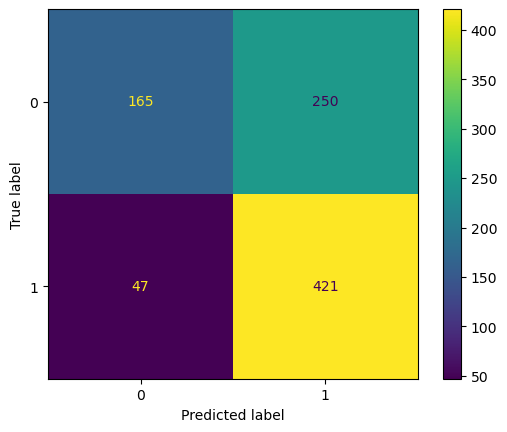

In [12]:
# Confusion Matrix Display 

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

**Observations:** 

- The first thing we note about the following is that the the data we have is too small and therefore we are not getting accurate predictions. 

- From the confusion matrix we can see that the model was able to accurately predict `165` out of `415` as class 0 and for class 1 it accurately predicted `421` out of `468`.

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 421    | 165    | 47     | 250    |

- We can see that it was able to predict most values for class 1 as `1` compared to class 0. This could be because size of class 1 might be greater than class 0. 

Let's go ahead and see our classification report for the above.

In [13]:
# Classification Report 

apple_report = classification_report(y_test, y_pred_apple)
print(apple_report)

              precision    recall  f1-score   support

           0       0.78      0.40      0.53       415
           1       0.63      0.90      0.74       468

    accuracy                           0.66       883
   macro avg       0.70      0.65      0.63       883
weighted avg       0.70      0.66      0.64       883



**Observations:** 

- As observed earlier, the total samples for class 0 is `415` and for class 1 is `468` this tells us that the amount of data we have is very small and therefore could cause an issue moving forward when applying more complex models. 

- Our classification report also shows how it predicted `78%` of the samples as class 0 and `63%` of the samples as class 1. The recall for class 0 is at `40%` which tells us that only 40% of the actual class 0 samples were correctly identified. While, the recall for class 1 is at `90%` meaning it that 90% of the actual class 1 samples were correctly identified. 

- We can also evaluate our model accuracy using the f1-score accuracy. In our case this accuracy is at `66%` meaning only 66% of the predictions across all classes are correct. 

Our next step would be to go back to our EDA notebook and prepare a dataset with more values. 

---

### Logistic Regression - Original Dataframe

The following models are implemented after performing further EDA from EDA-2 notebook.

In [14]:
# Loading our clean dataset from the EDA - 2 Notebook 

stocks_df = pd.read_csv('../clean_data.csv')

In [15]:
# Viewing our dataframe 

stocks_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Adj Closing Yday,Adj Closing Price Change
0,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,6.562591,1
1,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,6.573935,0
2,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,6.469369,0
3,7.510714,7.571429,7.466429,7.570714,6.500339,447610800,6.457407,1
4,7.600000,7.607143,7.444643,7.503929,6.442997,462229600,6.500339,0
5,7.471071,7.491786,7.372143,7.418571,6.369709,594459600,6.442997,0
6,7.423929,7.533214,7.289286,7.523214,6.459555,605892000,6.369709,1
7,7.503929,7.516429,7.465000,7.479643,6.422143,432894000,6.459555,0
8,7.533214,7.557143,7.352500,7.354643,6.314816,594067600,6.422143,0
9,7.440357,7.685357,7.401429,7.680000,6.594175,730007600,6.314816,1


In [16]:
# Shape of our dataframe 

stocks_df.shape

(271679, 8)

In [17]:
print(f"We are back to our original dataframe that now has {stocks_df.shape[0]} rows and {stocks_df.shape[1]} columns.")

We are back to our original dataframe that now has 271679 rows and 8 columns.


In [18]:
# Applying Logistic Regression 

# Assigning Variables 

X = stocks_df.drop(['Open', 'Adj Closing Price Change', 'High', 'Low', 'Close'], axis= 1)
y = stocks_df['Adj Closing Price Change']

In [19]:
# Split into train/test 

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [20]:
# Let's view the shape our splits 

print(f"After the split our Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")

print(f"After the split our Test set has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

print(f"After the split our Validation set has {X_val.shape[0]} rows and {X_val.shape[1]} columns.")

print(f"After the split our Remainder set has {X_rem.shape[0]} rows and {X_rem.shape[1]} columns.")

After the split our Training set has 152140 rows and 3 columns.
After the split our Test set has 81504 rows and 3 columns.
After the split our Validation set has 38035 rows and 3 columns.
After the split our Remainder set has 190175 rows and 3 columns.


In [21]:
# Scaling the data 

# Scaling 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Logistic Regression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.8395293808334429
Validation score 0.8384382805310898
Test score 0.8345848056537103


The scores on the following base logistic model are higher than what we had from the first model we ran above. Let's take a further look at the performance of this model. 

In [23]:
# Predicting on unseen data
y_pred_original = logreg.predict(X_test_scaled)

Let's go ahead and print our confusion matrix and the classification report. 

In [24]:
# Confusion Matrix 

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_original)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,25368,13402
True Positive,80,42654


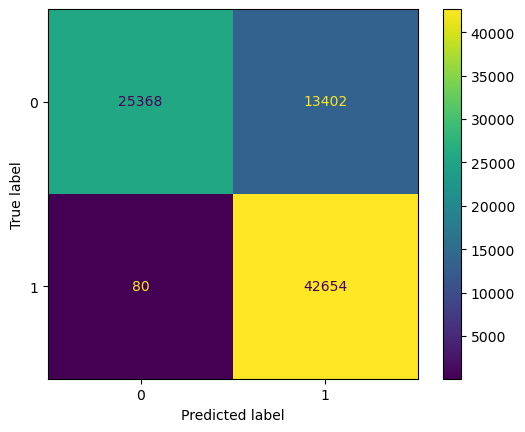

In [25]:
# Confusion Matrix Display 

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

**Observations:** 

- Now that we have our dataframe with a larger dataset we can see how the model is performing. Through the confusion matrix above we get the following results: 

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 42654  | 25368  | 80     | 13402  |

- Out of a total sample of 38770 it accurately predicted 25368 for class 0 and with a total sample of 42734 it accurately predicted 42654 as class 1. The model was once again was able to predict class 1 with a higher accuracy then class 0. 

In [26]:
report = classification_report(y_test, y_pred_original)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     38770
           1       0.76      1.00      0.86     42734

    accuracy                           0.83     81504
   macro avg       0.88      0.83      0.83     81504
weighted avg       0.87      0.83      0.83     81504



**Observations:** 

- We noticed through the confusion matrix that the values in predicted and true label varied a lot. This possibly could happen because of the class imbalance. Despite getting a larger dataset we were not able to down-sample the target class in order to get more accurate values. 

- Using the classification report we can see that our f1-score accuracy is 83%. This is an increase from our previous model which had the accuracy score of 66%. Therefore, this model is performing 17% more accurately than the last one. 

- Observing the precision and recall, we can see that the precision for class 0 is higher than that of class 1 as it is able to better predict the sample as class 0. When we look at the recall, in this aspect it is higher for class 1 compared to class 0 as it almost perfectly identified the class 1 samples as class 1. 

Our next step would be to take a sample of the original dataframe. We will be taking about 15% as the sample and also down-sampling the target column in order to make better predictions and we will be dropping the columns we do not require. The EDA has been done on the EDA-2 notebook. 

---

### Logistic Regression - Sample Data

### After sampling(based on EDA-2 notebook):

In [27]:
# Loading our balanced dataset from the EDA - 2 Notebook 

balanced_df = pd.read_csv('../sample_balanced_data.csv')

In [28]:
# Viewing the first 5 rows 

balanced_df.head(5)

,Adj Close,Adj Closing Yday,Adj Closing Price Change
0,18.092905,18.092905,0
1,66.758507,67.133293,0
2,56.311829,56.557949,0
3,66.614342,67.113411,0
4,259.309998,259.809998,0


In [29]:
# Value counts of the target column 

balanced_df['Adj Closing Price Change'].value_counts()

0    19168
1    19168
Name: Adj Closing Price Change, dtype: int64

Now, we took a sample of our original dataframe in order to reduce the computational speed of running models and we were able to downsample the target column giving us the exact same for both classes.

In [30]:
# Assigning Variables 

X_balanced = balanced_df.drop(['Adj Closing Price Change'], axis= 1)
y_balanced = balanced_df['Adj Closing Price Change']

In [31]:
# Split into train/test 

# Splitting the test and remainder

X_rem, X_test, y_rem, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=1)

# Splitting the train and validation 

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, stratify=y_rem, random_state=2)

In [32]:
# Let's view the shape our splits 

print(f"After the split our Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")

print(f"After the split our Test set has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

print(f"After the split our Validation set has {X_val.shape[0]} rows and {X_val.shape[1]} columns.")

print(f"After the split our Remainder set has {X_rem.shape[0]} rows and {X_rem.shape[1]} columns.")

After the split our Training set has 21468 rows and 2 columns.
After the split our Test set has 11501 rows and 2 columns.
After the split our Validation set has 5367 rows and 2 columns.
After the split our Remainder set has 26835 rows and 2 columns.


In [33]:
# Scaling the data 

# Scaling 

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

As you may notice in the logisitic models that we ran previously, we focused on standardizing our data using the StandardScaler. In the following case, we will now be standardizing our data using the MinMax Scaler as our target column is binary. This will then standardize the data between 1 and 0 and will help us preserve the relationship between the data points. 

In [34]:
# Logistic Regression

# Intializing the log reg
logreg = LogisticRegression()

# Fitting our training data
logreg.fit(X_train_scaled, y_train)

# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.524501583752562
Validation score 0.5077324389789454
Test score 0.5122163290148682


This base model would now serve as the starting point for our modelling process. We can see the accuracies on different splits. Let's take a look at how this accuracy plays on the confusion matrix and then generate the classification report.

In [35]:
# Predicting on unseen data 

y_pred = logreg.predict(X_test_scaled)


In [36]:
# Confusion Matrix 

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,4565,1185
True Positive,4425,1326


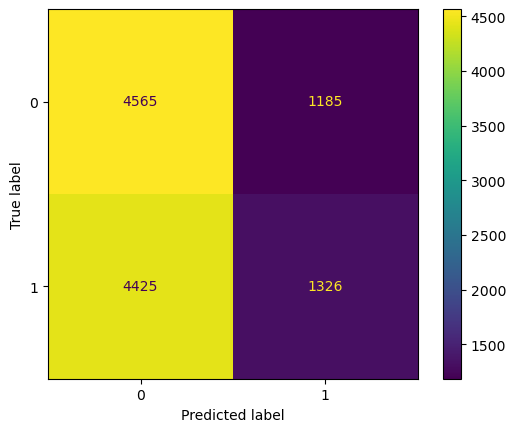

In [37]:
# Confusion Matrix Display 

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

**Observations:**

- We were able to generate our confusion matrix, lets take a look at the different values present: 

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 1326   | 4565   | 4425   | 1185   |

- Using the information above, we can see that the model predicts the samples better for class 0 compared to class 1. This is evident as through the matrix we can see the total sample for class 1 is 5751 and it accurately predicted 1326 only. While for class 0 the total sample was 5750 and it accurately predicted 4565. This tells us that the model is better performing for class 0. Let's look at it in more depth by analyzing our classification report. 

In [38]:
# Classification Report 

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.79      0.62      5750
           1       0.53      0.23      0.32      5751

    accuracy                           0.51     11501
   macro avg       0.52      0.51      0.47     11501
weighted avg       0.52      0.51      0.47     11501



**Observations:** 

- As per our classification report the precision for class 1 is higher than that of class 0. This tell us that 53% of the samples predicted as class 1 were actually true positives, while for class 0 it accurately predicted 51% as true positives. When we look at the recall, it significantly higher for class 0 standing at 79% which tells us that 79% of the actual class 0 samples were correctly identified whereas for class 1 it is a very low score standing at 23%. 

- Evaluting the model it has an f1-score of 62% for class 0 whereas 32% for class 1. This tells us that the model is better performing for class 0. While overall the model accuracy when considering both samples is at 51%.

- Our next steps would be to optimize this base model. To do so we will be creating a pipeline and passing parameters which would give us a better evaluation of the model. 

Our results so far: 

| Model               | Parameters | Accuracy |
|---------------------|------------|----------|
| Logistic Regression | Base       | 51%      |
|                     |            |          |

Let's create our pipeline:

In [39]:
# Creating a pipeline to optimize logreg

#Importing the packages

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [40]:
# Creating our estimators

estimators = [
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]

In [41]:
# Creating a temp file to store our cache

from tempfile import mkdtemp
cachedir = mkdtemp()

# Intializing the pipeline
my_pipe = Pipeline(estimators, memory=cachedir)

In [42]:
# Setting our parameters for logistic regression 

logreg_params = {
    'scaler': [MinMaxScaler()],
    'model': [LogisticRegression(random_state = 1)],
    'model__solver': ['liblinear', 'lbfgs'],
    'model__penalty': ['l1','l2'],
    'model__max_iter': [50000]
}

In [43]:
# Initializing the grid search 

logreg_grid = GridSearchCV(my_pipe, param_grid =logreg_params, cv = 5, verbose = 2)

In [44]:
# Fitting the grid search 

logreg_fit_grid = logreg_grid.fit(X_rem, y_rem.values.ravel())

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=   9.1s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=  10.3s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=   9.8s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=  10.3s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=liblinear, scaler=MinMaxScaler(); total time=   9.8s
[CV] END model=LogisticRegression(random_state=1), model__max_iter=50000, model__penalty=l1, model__solver=lbfgs, scaler=MinMaxScaler(); tot

In [46]:
# Printing our results 

print(f"best score: {logreg_fit_grid.best_score_}")
print(f"best parameters: {logreg_fit_grid.best_params_}")

best score: 0.9606484069312465
best parameters: {'model': LogisticRegression(max_iter=50000, penalty='l1', random_state=1,
                   solver='liblinear'), 'model__max_iter': 50000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'scaler': MinMaxScaler()}


**Observations:** 

- After running our grid search we were able to identify our best parameters for the logistic regression model. We did not include the `C` values which we will do now as it was taking a very long time to compute.

Therefore we have the following results: 

| **Score** | **Parameters**                                                                                           |
|-----------|----------------------------------------------------------------------------------------------------------|
| 96%       | 'model__max_iter': 50000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'scaler': MinMaxScaler() |

In [47]:
#save best model 

joblib.dump(logreg_fit_grid, 'logreg.pkl')

['logreg.pkl']

We will now find the optimum C value before running our logistic model with all the best params.

In [62]:
# Initalize an empty list to store all our CV's scores
cross_validation_scores = []

# Specify the range of C_values we want to test
C_range = np.array([.001,0.1, 1,10])

#Do some cross validation
for c in C_range:
    # Instantiate the model
    LR_model = LogisticRegression(C=c, solver="lbfgs", max_iter=10000, random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_rem, y_rem, cv = 5))
    
    #append to our empty list 
    cross_validation_scores.append(cv_score)
    
    #print the results for C value and CV score
    print(f"C value: {c}")
    print(f"CV Score: {cv_score}")
    print("-----------------------")

C value: 0.001
CV Score: 0.983901621017328
-----------------------
C value: 0.1
CV Score: 0.9962735233836408
-----------------------
C value: 1.0
CV Score: 0.9983230855226385
-----------------------
C value: 10.0
CV Score: 0.9992174399105647
-----------------------


While observing the accuracy with each C-value we can see that as the C value increases the accuracy is also increasing. 

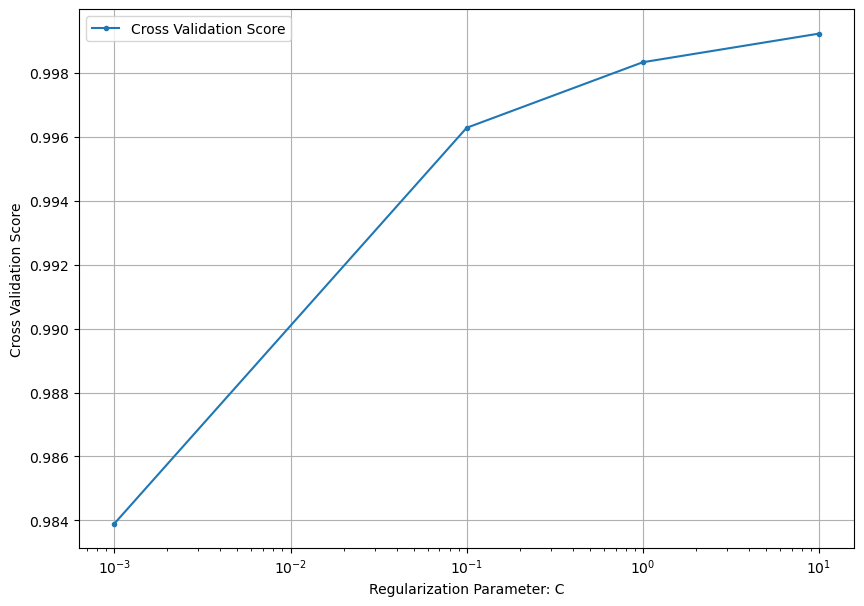

In [63]:
# Let's plot the graph

plt.figure(figsize=(10, 7))
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

We will use the inbuilt function to get the best value.

In [64]:
which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

The best model has C =  10.0


Now that we have our optimum C value we can plug in our best parameters and check whether our score has gone up or down. 

| **Score** | **Parameters**                                                                                           |
|-----------|----------------------------------------------------------------------------------------------------------|
| 96%       | 'model__max_iter': 50000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'scaler': MinMaxScaler() |

In [60]:
# Logistic Regression

# Intializing the log reg
logreg = LogisticRegression(C=10, solver='liblinear', penalty='l1', max_iter=50000, random_state=1)

In [61]:
# Fitting our training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=10, max_iter=50000, penalty='l1', random_state=1,
                   solver='liblinear')

In [65]:
# Printing results
print("Train score", logreg.score(X_train_scaled, y_train))
print("Validation score", logreg.score(X_val_scaled, y_val))
print("Test score", logreg.score(X_test_scaled, y_test))

Train score 0.9906372275013974
Validation score 0.9914291037823738
Test score 0.9903486653334492


Our accuracy score is looking really good, let's take a look at our confusion matrix and the classification report. 

In [66]:
# Predicting on unseen data 

y_pred_optimized = logreg.predict(X_test_scaled)


In [67]:
# Confusion Matrix 

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_optimized)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,5750,0
True Positive,111,5640


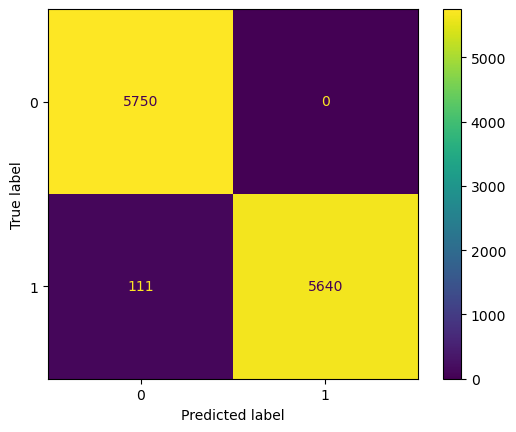

In [68]:
# Confusion Matrix Display 

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

**Observations:**

- After optimizing our logistic regression model we can see a much better confusion matrix than the base model. The following are the results of the confusion matrix: 

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 5640   | 5750   | 111    | 0      |

- Using the information above, we can see that the model predicts the samples better for class 0 compared to class 1. This is evident as through the matrix we can see the total sample for class 1 is 5751 and it accurately predicted 5640 only. While for class 0 the total sample was 5750 and it accurately predicted 5750. This tells us that the model is better performing for class 0. Let's look at it in more depth by analyzing our classification report. 

In [69]:
# Classification Report 

logreg_optimized_report = classification_report(y_test, y_pred_optimized)
print(logreg_optimized_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5750
           1       1.00      0.98      0.99      5751

    accuracy                           0.99     11501
   macro avg       0.99      0.99      0.99     11501
weighted avg       0.99      0.99      0.99     11501



**Observations:**

- As per our classification report the precision for class 1 is higher than that of class 0. This tell us that 100% of the samples predicted as class 1 were actually true positives, while for class 0 it accurately predicted 98% as true positives. When we look at the recall, it is higher for class 0 standing at 100% which tells us that 100% of the actual class 0 samples were correctly identified whereas for class 1 it is at 98%. 

- Evaluting the model it has an f1-score of 99% for class 0 and 99% for class 1. This tells us that the model is better performing for both classes. While overall the model accuracy when considering both samples is at 99%.

- Our next steps would be to experiment using a different model and see how the model behaves differently compared to the logistic regression.

Our updated results: 

| Model                         | Parameters                                                                 | Accuracy |
|-------------------------------|----------------------------------------------------------------------------|----------|
| Logistic Regression           | Base                                                                       | 51%      |
| Logistic Regression Optimized | C = 10, penalty='l1', solver='liblinear', max-iter='50000', random_state=1 | 99%      |

---

## SVM - Support Vector Machines

The next model we will be looking at are SVM's. To get started we will first run the base model then optimize it to get the best scores.

In [70]:
# Importing the model 

from sklearn.svm import LinearSVC

# Initalizing the model 
SVM_model = LinearSVC(random_state=1)

#Fit the model 
SVM_model.fit(X_train_scaled, y_train)

#Printing scores 
print("Train score", SVM_model.score(X_train_scaled, y_train))
print("Validation score", SVM_model.score(X_val_scaled, y_val))
print("Test score", SVM_model.score(X_test_scaled, y_test))

Train score 0.6055990311160797
Validation score 0.5953046394633874
Test score 0.5961220763411877


The following scores are better than the scores from our base logistic regression model. Let's map out our confusion matrix and classification report to see how the model behaves. 

In [71]:
# predicting on unseen data 

y_pred_SVM = SVM_model.predict(X_test_scaled)

In [72]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_SVM)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,5067,683
True Positive,3962,1789


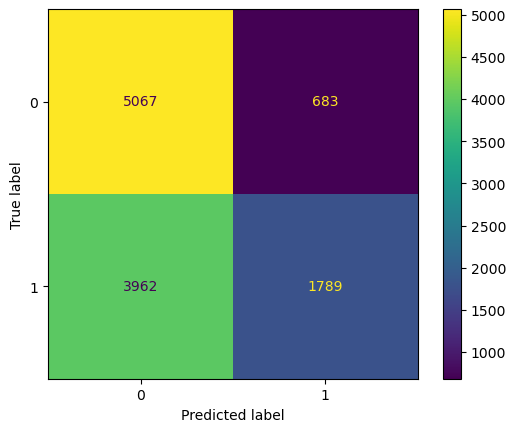

In [73]:
#Confusion matrix display 

ConfusionMatrixDisplay.from_estimator(SVM_model, X_test_scaled, y_test)

**Observations:** 

- We were able to generate our confusion matrix, lets take a look at the different values present: 

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 1789   | 5067   | 3962   | 683    |

- Using the information above, we can see that the model predicts the samples better for class 0 compared to class 1. This is evident as through the matrix we can see the total sample for class 1 is 5751 and it accurately predicted 1789 only. While for class 0 the total sample was 5750 and it accurately predicted 5067. This tells us that the model is better performing for class 0. Let's look at it in more depth by analyzing our classification report. 

In [74]:
# Classification Report 

report_svm = classification_report(y_test, y_pred_SVM)
print(report_svm)

              precision    recall  f1-score   support

           0       0.56      0.88      0.69      5750
           1       0.72      0.31      0.44      5751

    accuracy                           0.60     11501
   macro avg       0.64      0.60      0.56     11501
weighted avg       0.64      0.60      0.56     11501



**Observations:**

- As per our classification report the precision for class 1 is higher than that of class 0. This tell us that 72% of the samples predicted as class 1 were actually true positives, while for class 0 it accurately predicted 56% as true positives. When we look at the recall, it significantly higher for class 0 standing at 88% which tells us that 88% of the actual class 0 samples were correctly identified whereas for class 1 it is a very low score standing at 31%. 

- Evaluting the model it has an f1-score of 69% for class 0 whereas 44% for class 1. This tells us that the model is better performing for class 0. While overall the model accuracy when considering both samples is at 60%.

- Our next steps would be to optimize this base model. To do so we will be creating a pipeline and passing parameters which would give us a better evaluation of the model. 

Our results: 

| Model                         | Parameters                                                                 | Accuracy |
|-------------------------------|----------------------------------------------------------------------------|----------|
| Logistic Regression           | Base                                                                       | 51%      |
| Logistic Regression Optimized | C = 10, penalty='l1', solver='liblinear', max-iter='50000', random_state=1 | 99%      |
| SVM                           | Base                                                                       | 60%      |

Let's optimize our svm model by creating a pipeline and passing in parameters.

In [75]:
# SVM Pipeline params

svm_params = {
    'scaler': [MinMaxScaler()],
    'model': [LinearSVC(random_state = 1)],
    'model__C': [0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1','l2'],
    'model__max_iter': [50000]
}

In [76]:
# Initializing grid search 

svm_grid = GridSearchCV(my_pipe, param_grid =svm_params, cv = 5, verbose = 2)

In [77]:
# Fitting grid search 

svm_fit_grid = svm_grid.fit(X_rem, y_rem.values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l1, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalty=l2, scaler=MinMaxScaler(); total time=   0.0s
[CV] END model=LinearSVC(random_state=1), model__C=0.01, model__max_iter=50000, model__penalt

In [78]:
# Printing our scores and params

print(f"best score: {svm_fit_grid.best_score_}")
print(f"best parameters: {svm_fit_grid.best_params_}")

best score: 0.9811440283212223
best parameters: {'model': LinearSVC(C=1000, max_iter=50000, random_state=1), 'model__C': 1000, 'model__max_iter': 50000, 'model__penalty': 'l2', 'scaler': MinMaxScaler()}


In [79]:
#save best model 

joblib.dump(svm_fit_grid, 'svm.pkl')

['svm.pkl']

Now that we have our best parameters, lets go ahead and input those into our base model and see if it changes the accuracies. 

| **Score** | **Parameters**                                                                               |
|-----------|----------------------------------------------------------------------------------------------|
| 98%       | 'model__C': 1000, 'model__max_iter': 50000, 'model__penalty': 'l2', 'scaler': MinMaxScaler() |

In [80]:
# Initalizing the model 
SVM_model = LinearSVC(C=1000, max_iter=50000, penalty='l2', random_state=1)

In [81]:
#Fit the model 
SVM_model.fit(X_train_scaled, y_train)

LinearSVC(C=1000, max_iter=50000, random_state=1)

In [82]:
#Printing scores 
print("Train score", SVM_model.score(X_train_scaled, y_train))
print("Validation score", SVM_model.score(X_val_scaled, y_val))
print("Test score", SVM_model.score(X_test_scaled, y_test))

Train score 0.9757313210359605
Validation score 0.9754052543320291
Test score 0.9765237805408226


From the following scores above we can see that the test score is higher than our training and validation score. This means that our optimized model is overfitting the training data. Let's look at the results in more depth by plotting our confusion matrix and the classification score.

In [83]:
# predicting on unseen data 

y_pred_SVM = SVM_model.predict(X_test_scaled)

In [84]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_SVM)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,5750,0
True Positive,270,5481


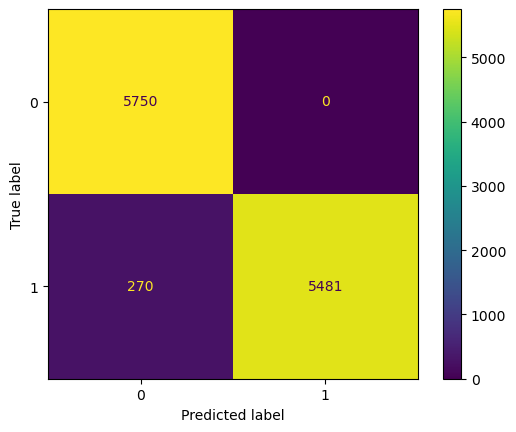

In [85]:
#Confusion matrix display 

ConfusionMatrixDisplay.from_estimator(SVM_model, X_test_scaled, y_test)

**Observations:** 

- We were able to generate our confusion matrix, lets take a look at the different values present: 

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 5481   | 5750   | 270    | 0      |

- Using the information above, we can see that the model predicts the samples better for class 0 compared to class 1. This is evident as through the matrix we can see the total sample for class 1 is 5751 and it accurately predicted 5481. While for class 0 the total sample was 5750 and it accurately predicted 5750. This tells us that the model is better performing for class 0. Let's look at it in more depth by analyzing our classification report. 

In [86]:
# Classification Report 

report_svm = classification_report(y_test, y_pred_SVM)
print(report_svm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5750
           1       1.00      0.95      0.98      5751

    accuracy                           0.98     11501
   macro avg       0.98      0.98      0.98     11501
weighted avg       0.98      0.98      0.98     11501



**Observations:**

- As per our classification report the precision for class 1 is higher than that of class 0. This tell us that 100% of the samples predicted as class 1 were actually true positives, while for class 0 it accurately predicted 96% as true positives. When we look at the recall, it is higher for class 0 standing at 100% which tells us that 100% of the actual class 0 samples were correctly identified whereas for class 1 it is standing at 95%. 

- Evaluting the model it has an f1-score of 98% for class 0 and 98% for class 1. This tells us that the model is performing very similarly for both classes. While overall the model accuracy when considering both samples is at 98%.

- Our next steps would be run another model. 

Our results are: 

| Model                         | Parameters                                                                 | Accuracy |
|-------------------------------|----------------------------------------------------------------------------|----------|
| Logistic Regression           | Base                                                                       | 51%      |
| Logistic Regression Optimized | C = 10, penalty='l1', solver='liblinear', max-iter='50000', random_state=1 | 99%      |
| SVM                           | Base                                                                       | 60%      |
| SVM optimized                 | C = 1000, max-iter=50000, penalty='l2', random_state=1                     | 98%      |

---

## Random Forest 

After looking at logistic regression and svm's, we will now focus on random forest. 

In [87]:
# Importing the model 

from sklearn.ensemble import RandomForestClassifier

#Initializing the model 
random_forest_model = RandomForestClassifier(random_state=1) 

#Fitting the model 
random_forest_model.fit(X_train_scaled, y_train)

# printing scores
print("Train score", random_forest_model.score(X_train_scaled, y_train))
print("Validation score", random_forest_model.score(X_val_scaled, y_val))
print("Test score", random_forest_model.score(X_test_scaled, y_test))

Train score 1.0
Validation score 0.9580771380659586
Test score 0.9571341622467612


Observing the results above, the base model gave us a really good score. The reason why the training score is 1.0 is because the model has achieved a perfect prediction on the training data. Let's plot the confusion matrix and the classification report. 

In [88]:
# Predicting on unseen data 

y_pred_rf = random_forest_model.predict(X_test_scaled)

In [89]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,5508,242
True Positive,251,5500


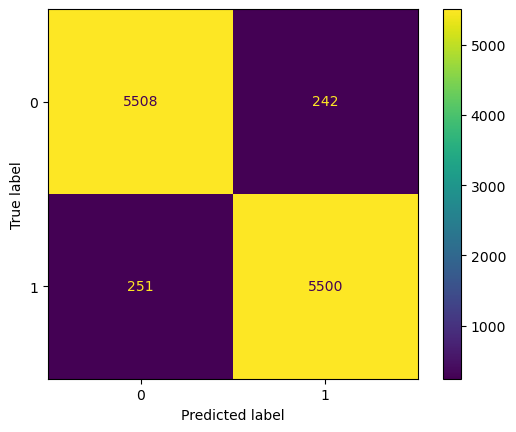

In [90]:
# Displaying the confusion matrix 

ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test_scaled, y_test)

**Observations:**

- We were able to generate our confusion matrix, lets take a look at the different values present: 

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 5500   | 5508   | 251    | 242    |

- Using the information above, we can see that the model predicts the samples better for both classes. This is evident as through the matrix we can see the total sample for class 1 is 5751 and it accurately predicted 5500. While for class 0 the total sample was 5750 and it accurately predicted 5508. This tells us that the model is well for both classes and seems very balanced. Let's look at it in more depth by analyzing our classification report. 

In [91]:
# Classification Report

report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5750
           1       0.96      0.96      0.96      5751

    accuracy                           0.96     11501
   macro avg       0.96      0.96      0.96     11501
weighted avg       0.96      0.96      0.96     11501



**Observations:**

- As per our classification report the precision for class 1 is the same as class 0. This tell us that 96% of the samples predicted as class 1 were actually true positives, while for class 0 it accurately predicted 96% as true positives as well. When we look at the recall, it is also the same for both as class 0 is standing at 96% which tells us that 96% of the actual class 0 samples were correctly identified whereas for class 1 it is also the same. 

- Evaluting the model it has an f1-score of 96% for class 0 and class 1. This tells us that the model is better performing for both classes equally. While overall the model accuracy when considering both samples is at 96%.

- Our next steps would be to optimize this base model. To do so we will be creating a pipeline and passing parameters which would give us a better evaluation of the model. 

Our results: 

| Model                         | Parameters                                                                 | Accuracy |
|-------------------------------|----------------------------------------------------------------------------|----------|
| Logistic Regression           | Base                                                                       | 51%      |
| Logistic Regression Optimized | C = 10, penalty='l1', solver='liblinear', max-iter='50000', random_state=1 | 99%      |
| SVM                           | Base                                                                       | 60%      |
| SVM optimized                 | C = 1000, max-iter=50000, penalty='l2', random_state=1                     | 98%      |
| Random Forest                 | Base                                                                       | 96%      |


Let's go ahead and optimize our random forest model. 

In [92]:
# Random Forest Pipeline 

rf_params = {
    'scaler': [MinMaxScaler()],
    'model': [RandomForestClassifier(random_state = 1)],
    'model__n_estimators': range(50, 201, 50),
    'model__max_depth': range(3, 12, 2)
}

In [93]:
# Initializing grid search 

rf_grid = GridSearchCV(my_pipe, param_grid =rf_params, cv = 5, verbose = 2)

In [95]:
#Fitting the grid search
rf_fit_grid = rf_grid.fit(X_rem, y_rem.values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END model=RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.3s
[CV] END model=RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.3s
[CV] END model=RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.3s
[CV] END model=RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.3s
[CV] END model=RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1), model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.3s
[CV] END model=RandomForestClassifier(max_depth=11, n_estimators=200, ran

In [96]:
# Printing the scores and params

print(f"best score: {rf_fit_grid.best_score_}")
print(f"best parameters: {rf_fit_grid.best_params_}")

best score: 0.871026644307807
best parameters: {'model': RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1), 'model__max_depth': 11, 'model__n_estimators': 200, 'scaler': MinMaxScaler()}


In [97]:
#save best model 

joblib.dump(rf_fit_grid, 'random_forest.pkl')

['random_forest.pkl']

Now that we have our best parameters lets go ahead and implement them in our model once again. 

| **Score** | **Parameters**                                                               |
|-----------|------------------------------------------------------------------------------|
| 87%       | 'model__max_depth': 11, 'model__n_estimators': 200, 'scaler': MinMaxScaler() |

In [98]:
# We will now implement the following best params on our model 

#Initializing the model 
random_forest_model = RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1) 

In [99]:
#Fitting the model 
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=11, n_estimators=200, random_state=1)

In [100]:
# printing scores
print("Train score", random_forest_model.score(X_train_scaled, y_train))
print("Validation score", random_forest_model.score(X_val_scaled, y_val))
print("Test score", random_forest_model.score(X_test_scaled, y_test))

Train score 0.8788429290106204
Validation score 0.8242966275386622
Test score 0.8231458134075298


After implementing our best params on our model once again, we get the different scores. This time we can see that the accuracies have dropped compared to our base model. Let's take a further look at this by printing our confusion matrix and the classification report. 

In [101]:
# predicting on unseen data 

y_pred_rf = random_forest_model.predict(X_test_scaled)

In [102]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,4919,831
True Positive,1203,4548


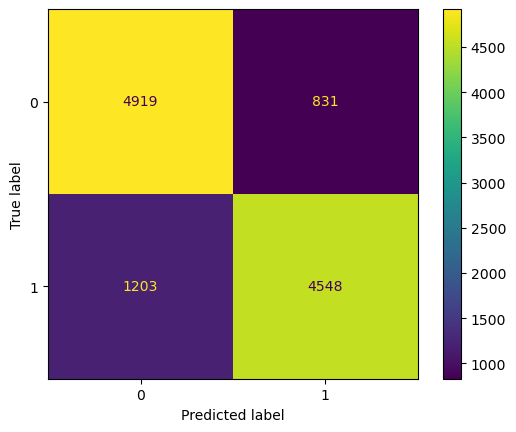

In [104]:
#Confusion matrix display 

ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test_scaled, y_test)

**Observations:** 

- We were able to generate our confusion matrix, lets take a look at the different values present: 

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 4548   | 4919   | 1203   | 831    |

- Using the information above, we can see that the model predicts the samples better for class 0 compared to class 1. This is evident as through the matrix we can see the total sample for class 1 is 5751 and it accurately predicted 4585. While for class 0 the total sample was 5750 and it accurately predicted 4919. This tells us that the model is better performing for class 0. Let's look at it in more depth by analyzing our classification report. 

In [105]:
# Classification Report 

report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      5750
           1       0.85      0.79      0.82      5751

    accuracy                           0.82     11501
   macro avg       0.82      0.82      0.82     11501
weighted avg       0.82      0.82      0.82     11501



**Observations:**

- As per our classification report the precision for class 1 is higher than that of class 0. This tell us that 85% of the samples predicted as class 1 were actually true positives, while for class 0 it accurately predicted 80% as true positives. When we look at the recall, it is higher for class 0 standing at 86% which tells us that 86% of the actual class 0 samples were correctly identified whereas for class 1 it is standing at 79%. 

- Evaluting the model it has an f1-score of 83% for class 0 and 82% for class 1. This tells us that the model is performing very similarly for both classes. While overall the model accuracy when considering both samples is at 82%.

- We can see a decrease by 14% in the accuracy of our model after optimizing it. 

- Our next steps would be run another model. 

Our results are: 

| Model                         | Parameters                                                                 | Accuracy |
|-------------------------------|----------------------------------------------------------------------------|----------|
| Logistic Regression           | Base                                                                       | 51%      |
| Logistic Regression Optimized | C = 10, penalty='l1', solver='liblinear', max-iter='50000', random_state=1 | 99%      |
| SVM                           | Base                                                                       | 60%      |
| SVM optimized                 | C = 1000, max-iter=50000, penalty='l2', random_state=1                     | 98%      |
| Random Forest                 | Base                                                                       | 96%      |
| Random Forest  Optimized      | max_depth=11, n_estimators=200, random_state=1                             | 82%      |

---

## XG Boost 

The last model we will be looking at is the XGBoost.

In [106]:
# Import the model 
from xgboost import XGBClassifier

# Initializing the model 
xgbc = XGBClassifier(random_state=1)

#Fitting the model
xgbc.fit(X_train_scaled, y_train)

#Printing scores
print("Train score", xgbc.score(X_train_scaled, y_train))
print("Validation score", xgbc.score(X_val_scaled, y_val))
print("Test score", xgbc.score(X_test_scaled, y_test))

Train score 0.9604061859511832
Validation score 0.9131730948388299
Test score 0.9076602034605686


By running the base model XGBoost we can see a very high score. Let's explore this futher by plotting our confusion matrix and the classification report. 

In [107]:
# Predicting on unseen data 

y_pred_xg = xgbc.predict(X_test_scaled)

In [108]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_xg)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,5193,557
True Positive,505,5246


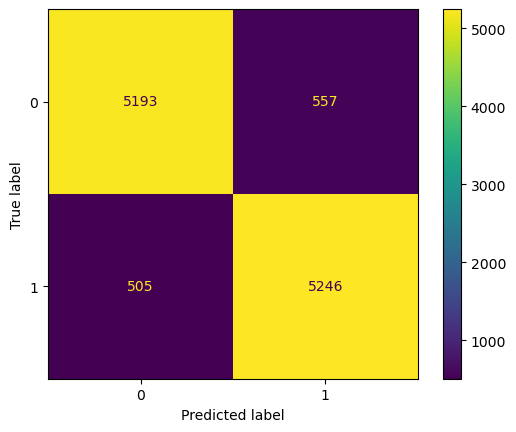

In [109]:
# Displaying confusion matrix 
ConfusionMatrixDisplay.from_estimator(xgbc, X_test_scaled, y_test)

**Observations:**

- We were able to generate our confusion matrix, lets take a look at the different values present: 

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 5246   | 5193   | 505    | 557    |

- Using the information above, we can see that the model predicts the samples better for both classes. This is evident as through the matrix we can see the total sample for class 1 is 5751 and it accurately predicted 5246. While for class 0 the total sample was 5750 and it accurately predicted 5193. This tells us that the model is well for both classes and seems very balanced. Let's look at it in more depth by analyzing our classification report. 

In [110]:
#Classification Report 

report_xg = classification_report(y_test, y_pred_xg)
print(report_xg)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      5750
           1       0.90      0.91      0.91      5751

    accuracy                           0.91     11501
   macro avg       0.91      0.91      0.91     11501
weighted avg       0.91      0.91      0.91     11501



**Observations:**

- As per our classification report the precision for class 0 is the almost same as class 1. This tell us that 90% of the samples predicted as class 1 were actually true positives, while for class 0 it accurately predicted 91% as true positives as well. When we look at the recall, it is also almost the same for both as class 0 is standing at 90% which tells us that 90% of the actual class 0 samples were correctly identified whereas for class 1 it is 91%. 

- Evaluting the model it has an f1-score of 91% for class 0 and class 1. This tells us that the model is better performing for both classes equally. While overall the model accuracy when considering both samples is at 91%.

- Our next steps would be to optimize this base model. To do so we will be creating a pipeline and passing parameters which would give us a better evaluation of the model. 

Our results: 

| Model                         | Parameters                                                                 | Accuracy |
|-------------------------------|----------------------------------------------------------------------------|----------|
| Logistic Regression           | Base                                                                       | 51%      |
| Logistic Regression Optimized | C = 10, penalty='l1', solver='liblinear', max-iter='50000', random_state=1 | 99%      |
| SVM                           | Base                                                                       | 60%      |
| SVM optimized                 | C = 1000, max-iter=50000, penalty='l2', random_state=1                     | 98%      |
| Random Forest                 | Base                                                                       | 96%      |
| Random Forest  Optimized      | max_depth=11, n_estimators=200, random_state=1                             | 82%      |
| XGBoost                       | Base                                                                       | 91%      |


We shall now optimize our base model by creating a pipeline and passing the parameters.

In [111]:
# XG Boost Pipeline 

xg_params = {
    'scaler': [MinMaxScaler()],
    'model': [XGBClassifier(random_state = 1)],
    'model__n_estimators': range(50, 201, 50),
    'model__max_depth': range(3, 12, 2),
    'model__learning_rate': [0.1, 0.3, 0.5, 0.7]
}

In [112]:
# Initializing grid 
xg_grid = GridSearchCV(my_pipe, param_grid =xg_params, cv = 5, verbose = 2)

In [114]:
#Fitting grid
xg_fit_grid = xg_grid.fit(X_rem, y_rem.values.ravel())

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...), model__learning_rate=0.1, model__max_depth=3, model__n_estimators=50, scaler=MinMaxScaler(); total time=   0.1s
[CV] END model=XGBClassifier(base_score=None, booster=None, c

In [115]:
# Printing best score and params

print(f"best score: {xg_fit_grid.best_score_}")
print(f"best parameters: {xg_fit_grid.best_params_}")

best score: 0.9507359791317309
best parameters: {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...), 'model__learning_rate': 0.7, 'model__max_depth': 11, 'model__n_estimators': 200, 'scaler': MinMaxScaler()}


In [116]:
#save best model 

joblib.dump(xg_fit_grid, 'xgboost.pkl')

['xgboost.pkl']

Now that we have our best parameters, let's go ahead and fit them into our base model. 

| **Score** | **Parameters**                                                                                            |
|-----------|-----------------------------------------------------------------------------------------------------------|
| 95%       | 'model__learning_rate': 0.7, 'model__max_depth': 11, 'model__n_estimators': 200, 'scaler': MinMaxScaler() |

In [119]:
#Applying the params

# Initializing the model 
xgbc = XGBClassifier(n_estimators=200, learning_rate=0.7, max_depth=11, random_state=1)

In [120]:
#Fitting the model
xgbc.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [121]:
#Printing scores
print("Train score", xgbc.score(X_train_scaled, y_train))
print("Validation score", xgbc.score(X_val_scaled, y_val))
print("Test score", xgbc.score(X_test_scaled, y_test))

Train score 0.9993478665921371
Validation score 0.9552822806036892
Test score 0.9521780714720459


After optimizing our model, we can see an increase in our test score by 4%. Let's evaluate this further by plotting our confusion matrix and the classification report. 

In [122]:
# Predicting on unseen data 

y_pred_xg = xgbc.predict(X_test_scaled)

In [123]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_xg)
# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Negative", "True Positive"]
)
display(cf_df)

,Predicted Class 0,Predicted Class 1
True Negative,5482,268
True Positive,282,5469


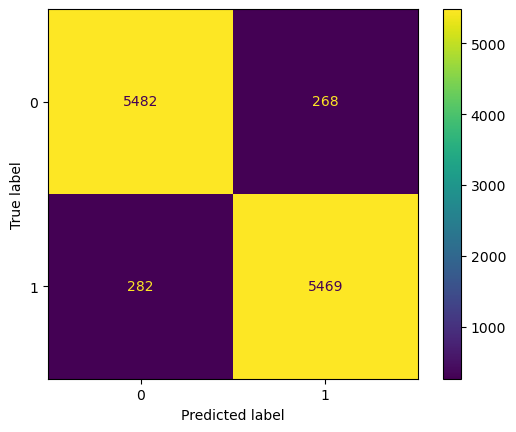

In [124]:
# Displaying confusion matrix 
ConfusionMatrixDisplay.from_estimator(xgbc, X_test_scaled, y_test)

**Observations:**

- We were able to generate our confusion matrix, lets take a look at the different values present: 

| **TP** | **TN** | **FN** | **FP** |
|--------|--------|--------|--------|
| 5469   | 5482   | 282    | 268    |


- Using the information above, we can see that the model predicts the samples better for both classes. This is evident as through the matrix we can see the total sample for class 1 is 5751 and it accurately predicted 5469. While for class 0 the total sample was 5750 and it accurately predicted 5482. This tells us that the model is well for both classes and seems very balanced. Let's look at it in more depth by analyzing our classification report. 

In [125]:
#Classification Report 

report_xg = classification_report(y_test, y_pred_xg)
print(report_xg)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5750
           1       0.95      0.95      0.95      5751

    accuracy                           0.95     11501
   macro avg       0.95      0.95      0.95     11501
weighted avg       0.95      0.95      0.95     11501



**Observations:**

- As per our classification report the precision for class 0 is the same as class 1. This tell us that 95% of the samples predicted as class 1 were actually true positives, while for class 0 it accurately predicted 95% as true positives as well. When we look at the recall, it is the same for both as class 0 is standing at 95% which tells us that 95% of the actual class 0 samples were correctly identified whereas for class 1 it is 95% as well. 

- Evaluting the model it has an f1-score of 95% for class 0 and class 1. This tells us that the model is better performing for both classes equally. While overall the model accuracy when considering both samples is at 95%.

Our results: 

| Model                         | Parameters                                                                 | Accuracy |
|-------------------------------|----------------------------------------------------------------------------|----------|
| Logistic Regression           | Base                                                                       | 51%      |
| Logistic Regression Optimized | C = 10, penalty='l1', solver='liblinear', max-iter='50000', random_state=1 | 99%      |
| SVM                           | Base                                                                       | 60%      |
| SVM optimized                 | C = 1000, max-iter=50000, penalty='l2', random_state=1                     | 98%      |
| Random Forest                 | Base                                                                       | 96%      |
| Random Forest  Optimized      | max_depth=11, n_estimators=200, random_state=1                             | 82%      |
| XGBoost                       | Base                                                                       | 91%      |
| XGBoost optimized             | n_estimators=200, learning_rate=0.7, max_depth=11, random_state=1          | 95%      |


---

## Conclusion:

---